Question3
------------
The goal of this part is to understand correlation between sond popularity and number of streaming
are they correlated and if not whcih other parameters could affect song popularity?


In [31]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
import requests
from pprint import pprint
import matplotlib.pyplot as plt
import os

#read csv file

music = "Data/data.csv"
song = pd.read_csv(music)

data= "Data/top10s.csv"
artist= pd.read_csv(data)

file= "Data/Spotify listener demographic_demographics.csv"
age= pd.read_csv(file, index_col=0, delim_whitespace=True)

fil= "Data/streamcountcsv.csv"
stream= pd.read_csv(fil)



In [40]:
#merge data
stream= stream.rename(columns={"Track Name": "title"})
combine= pd.merge(stream, artist, how= "outer", on= "title")
combinee= combine.drop_duplicates(subset=['title'])
combine_df= combinee[['title', 'Artist', 'Streams', 'artist', 'pop']]
clean_df=combine_df.dropna(how='any')

clean_df['pop']= clean_df['pop'].astype(int)


<ipython-input-40-74dee086127c>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [109]:
df = px.data.tips()
fig = px.histogram(clean, x="pop", y="Streams", color= "pop", title="streams Vs Popularity")
#fig.show()
fig.write_image("Images/stream-count.png")

    We can clearly notice that as popularity rank increase, so does number of ctreams. What does it means? who stream those songs?

Does age affect popularity trend?
Using a data that shows number of streaming in 2020 per age and country we will determine the generation that streams more on the platform.

In [41]:
#US streaming data per age
us_data= age[age["country"] == "US"]
us_file= us_data.dropna(how="any")
us_file= us_file[(us_file["age"] > 12) & (us_file["age"] < 75)]
coun_per_age= us_file.groupby(["age"])["playcount"].sum()


In [19]:
types=[]
# Categorize age by generations
    
for x in us_file["age"]:
    if  x< 21:
        name =  "Gen Z" 
        types.append(name) 
    elif x >= 21 and x < 40:
        name_2 = "Gen Y"
        types.append(name_2)
    elif x >= 40 and x < 56:
        name_3= "Gen X"
        types.append(name_3)
    elif x >= 56 :
        name_4= "Baby Boomers" 
        types.append(name_4)   


        
  
us_file["Category"]= types


In [20]:
#rename gender
gender=[]
# Categorize age by generations
    
for x in us_file["gender"]:
    if  x == "m":
        name =  "male" 
        gender.append(name) 
    elif x == "f":
        name_2 = "female"
        gender.append(name_2)
    elif x == "n":
        name_3= "non-gender"
        gender.append(name_3)
      

    
        
  
us_file["Gender"]= gender




In [23]:
df = px.data.tips()
fig = px.sunburst(us_file, path=['country','Category','Gender'], values='playcount', title= "Spotify streaming demographics")
fig.show()
fig.write_image("Images/sunbursts.png")

Text(0.5, 1.0, 'US demographics in 2020')

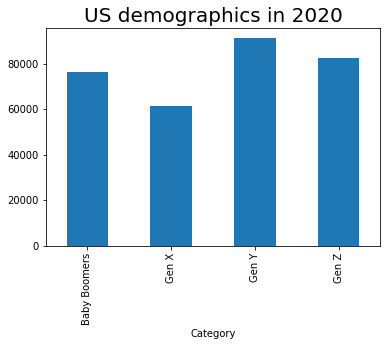

In [9]:
#look at us demographic to see the generation that has larger population portion
demographic= "Data/US Age .xlsx"
data_xls = pd.read_excel(demographic)
csv=data_xls.to_csv('Age.csv', encoding='utf-8')
demo= "Data/Age.csv"
us_demo= pd.read_csv(demo, skiprows=1, header=None).rename(columns=lambda x: x + 1)
us_demo.rename(columns=us_demo.iloc[0])
new_header = us_demo.iloc[0] 
us_demo = us_demo[1:] 
us_demo.columns = new_header 
us_demo_df=us_demo.rename(columns={'Sex and age':'Age'})
US=us_demo_df.set_index("Age")
us_df= US.groupby(["Category"]).sum()
bar= us_df[2020].plot(kind= "bar")
plt.savefig("Images/barz.png")
plt.title('US demographics in 2020',fontsize =20)

Since GenY is the demographic with the higher number and aslo the largest streamer demographic, How does that affect album sale over the year?

Text(0.5, 1.0, 'music revenue per year')

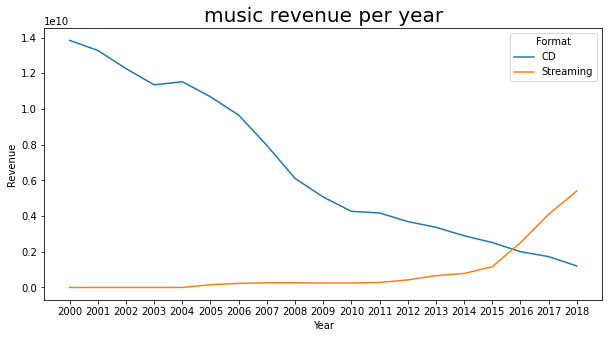

In [10]:
music_rev= "Data/music.csv"
revenue= pd.read_csv(music_rev)

revenue['Format'] = revenue['Format'].replace(to_replace=['DVD Audio','Download Album','DVD Audio', 'Cassette'], 
                                              value= 'CD', regex= True)
revenue['Format'] = revenue['Format'].replace(to_replace=['Limited Tier Paid Subscription',
                                                          'Other Ad-Supported Streaming ',
                                                          'On-Demand Streaming (Ad-Supported)', 'Paid Subscription' , 
                                                          'Download Music Video'], 
                                              value= 'Streaming', regex= True)
revenue_by_year= revenue.loc[revenue['Year']> 1999, :]
revenue_df= revenue_by_year.loc[(revenue_by_year['Format']== 'CD') | (revenue_by_year['Format']== 'Streaming'), :]
revenue_dd= revenue_df.groupby(['Format','Year'])["Revenue"].sum()
revenue_dd = revenue_dd.reset_index()
revenue_dd['Year']=revenue_dd['Year'].astype(str)

#create graph
import seaborn as sns
plt.figure(figsize=(10,5))
line= sns.lineplot(data = revenue_dd, x="Year", y="Revenue", hue='Format')

plt.savefig("Images/revenuep.png")
plt.title('music revenue per year',fontsize =20)



We notice that Cd sales is declining over the year while streaming revenue is inrecasing